# 합성곱신경망 (CNN, Convolutional Neural Network)

## 1. CNN의 이해
- `이미지 분석 전용 딥러닝 (로지스틱) 알고리즘` 중 하나 -> 분류하는 것이기 때문에 '로지스틱'
- 이미지를 작은 단위로 쪼개어 각 부분을 분석하는 것이 핵심
- 이미지를 인식하기 위한 패턴을 찾는데 유용함
- 예) 휴대폰 잠금해제 인식, 자동차 자율주행 같은 분야
- CNN은 다른 신경망과 마찬가지로 입력 계층(독립변수), 출력 계층(종속변수) 및 두 계층 사이의 여러 은닉 계층으로 구성됨 (즉, 지도학습의 일종)

## 2. CNN의 주요 개념
### 1) 합성곱 (Convolutional)
#### 1> 수학적 접근
- 합성곱 연산은 두 함수 $f$, $g$ 가운데 하나의 함수를 반전(reverse), 전이 (shift) 시킨 다음, 다른 하나의 함수와 곱한 결과를 적분하는 것을 의미

#### 2> 기술적 접근
- 사진에 필터를 적용하여 색감을 변경하는 처리로 이해하면 쉽다

#### 3> 2차원 입력 데이터 (Shape: (5:5))를 1개의 `필터`로 `합성곱 연산 수행`

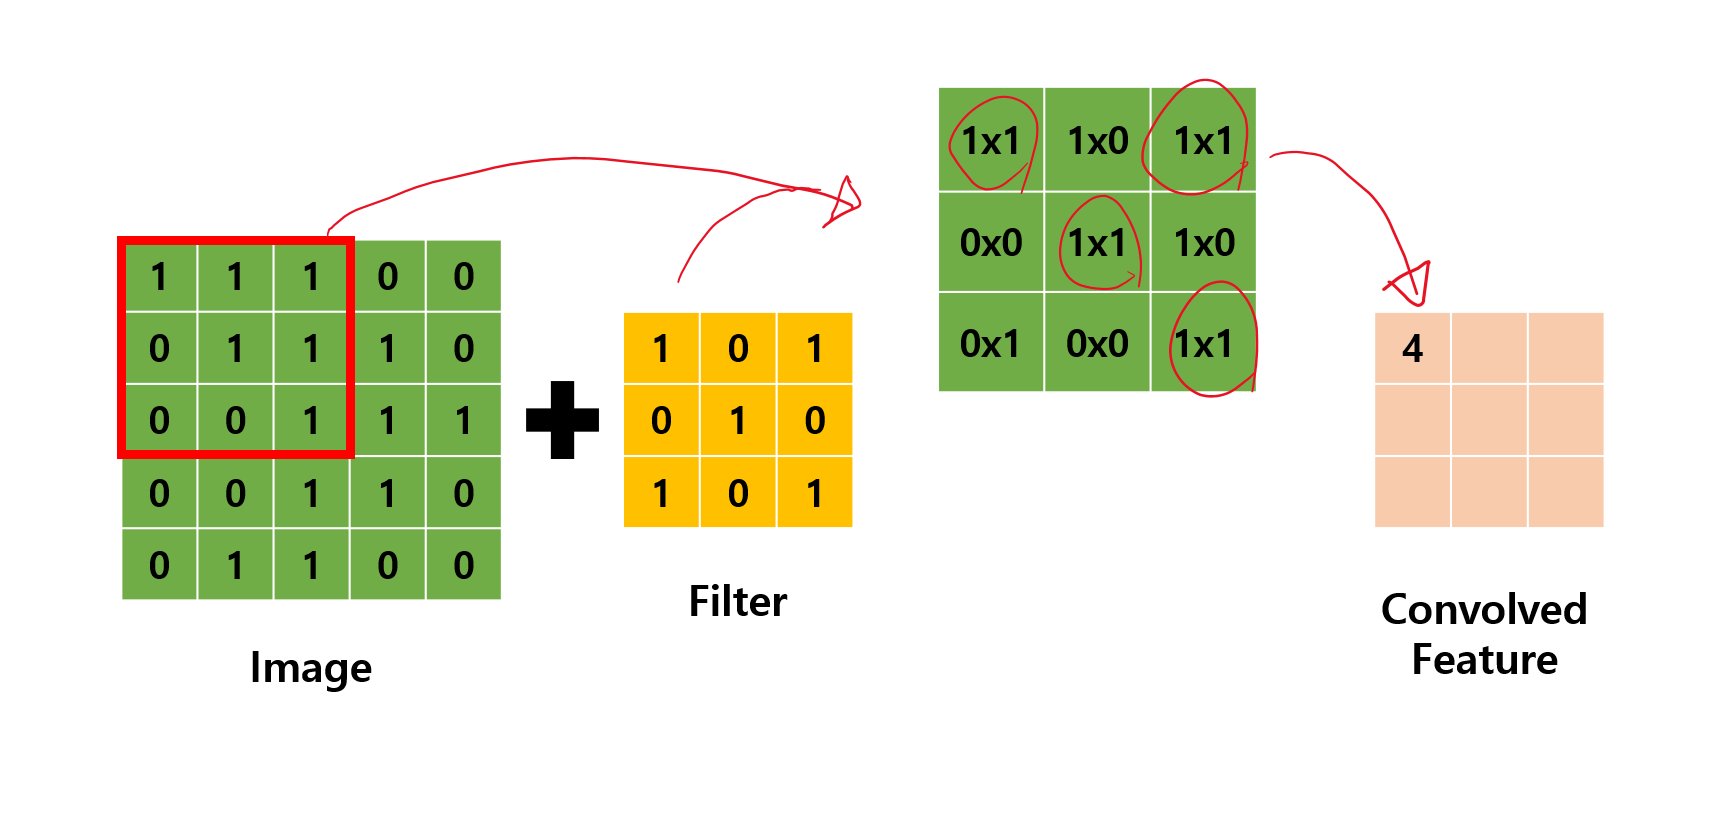

In [1]:
from IPython.display import display, Image
display(Image('image25_cnn.png'))

- 이미지 파일은 2차원 배열로 이루어져 있다
- 이미지 파일을 의미하는 2차원 배열의 각 원소는 `픽셀에 표시되는 새 값`을 의미한다
- 이미지 파일을 의미하는 2차원 배열의 각 원소에 일정한 값을 연산한다는 것은 `색상을 일관되게 변환`한다는 것을 의미

### 2) 채널 (Channel)
- 이미지 픽셀 하나하나는 `색상`을 의미하는 `0 ~ 255` 사이의 실수이다
- 흑백 이미지는 하나의 색상으로 명도만을 표현하면 되지만 컬러 사진은 천연색을 표현하기 위해서 각 픽셀을 RGB 3개의 실수로 표현한 3차원 데이터로 구성된다
 
|구분|구조|예시|
|--|--|--|
|흑백|2차원 데이터 (1개 채널)|높이가 39픽셀이고 폭이 31픽셀인 흑백사진 데이터의 shape은 (39, 31, 1)|
|컬러|3차원 데이터 (RGB 3개 채널)|높이가 39픽셀이고 폭이 31픽셀인 컬러 사진 데이터의 shape은 (39, 31, 3)|

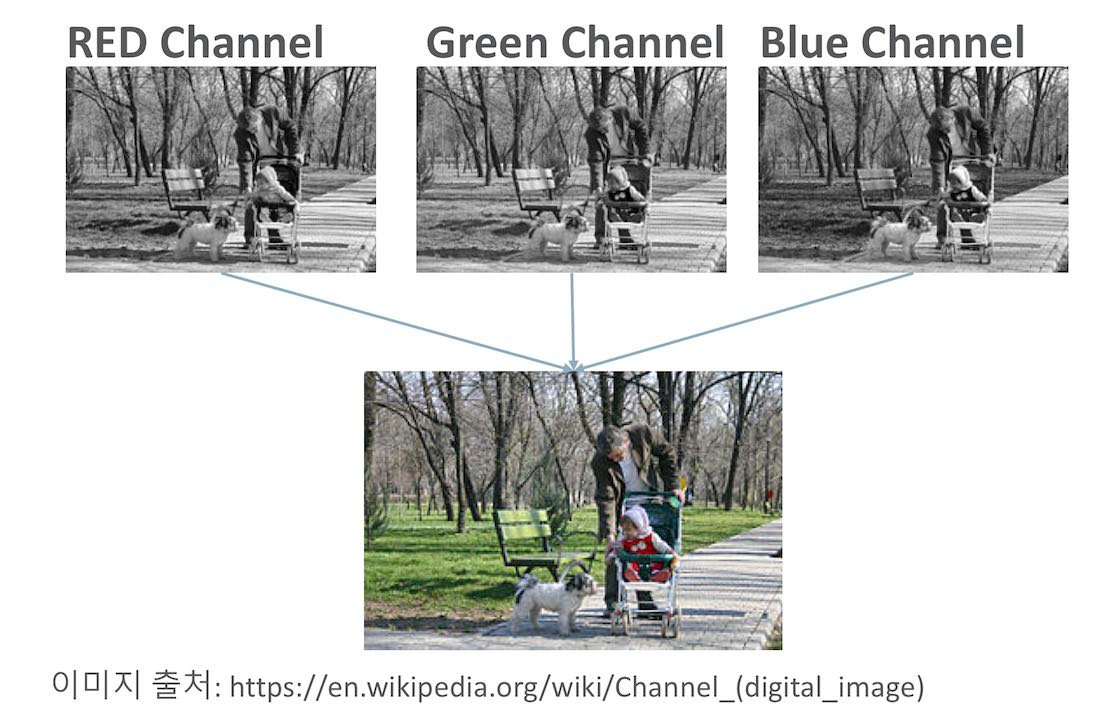

In [4]:
display(Image('image26_channel.jpg'))

### 3) 필터 (filter)
- 이미지의 특징을 찾아내기 위한 공용 파라미터
- Kernel이라고도 한다 (CNN에서 Filter와 Kernel은 같은 의미)
- 필터는 일반적으로 (4x4)이나 (3x3)과 같은 정사각 행렬로 정의된다
- CNN에서 학습의 대상은 필터이다

## 3. 합성곱 계산 절차
- 입력 데이터를 지정된 간격으로 순회하며 채널별로 합성곱을 하고 모든 채널(컬러의 경우 3개)의 합성곱의 합을 `Feature Map`로 만든다
- 필터는 `지정된 간격`으로 이동하면서 전체 입력데이터와 합성곱하여 `Feature Map`을 만든다
- 아래 그림은 `채널이 1`개인 입력 데이터를 `(3x3) 크기의 필터`로 합성곱하는 과정을 설명한다

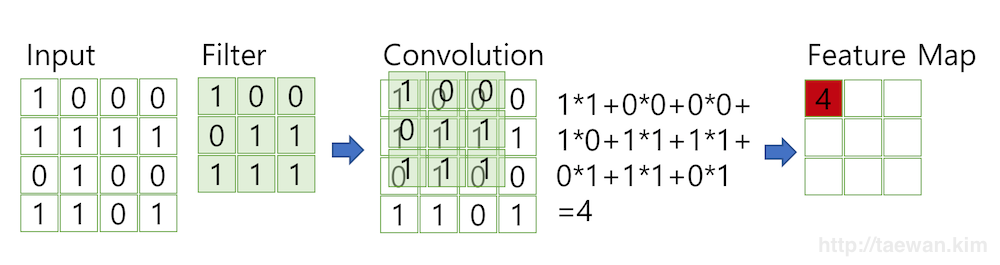

In [7]:
display(Image('image27_conv.png'))

### 1) `Feature Map` 과정
- 필터는 입력 데이터를 지정한 간격으로 순회하면서 합성곱을 계산한다
- 여기서 `지정된 간격`으로 필터를 순회하는 간격을 `Stride`라고 한다
- 아래 그림은 `stride`가 `1`로 필터를 입력 데이터에 순회하는 예제
> `stride가 2`로 설정되면 필터는 `2칸씩 이동`하면서 합성곱을 계산한다
>
> stride의 값이 클수록 처리 속도는 빨라지지만 이미지 식별도는 떨어진다

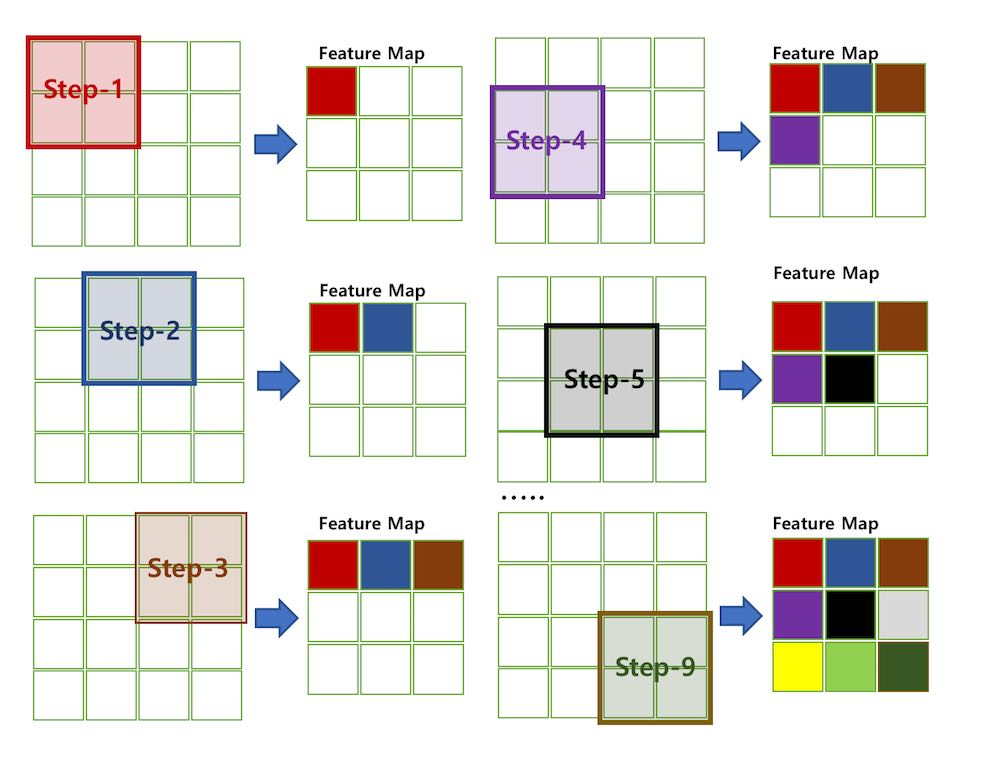

In [10]:
display(Image('image28_filter.jpg'))

### 2) `멀티 채널` 입력 데이터(i.e.,`컬러 이미지`)에 `필터를 적용`한 합성곱 계산 절차
- 입력 데이터가 여러 채널을 갖을 경우 필터는 `각 채널을 순회하며 합성곱을 계산`한 후, `채널별 피처 맵`을 만든다
- 그리고 각 채널의 피처 맵을 `합산`하여 최종 피처 맵을 반환

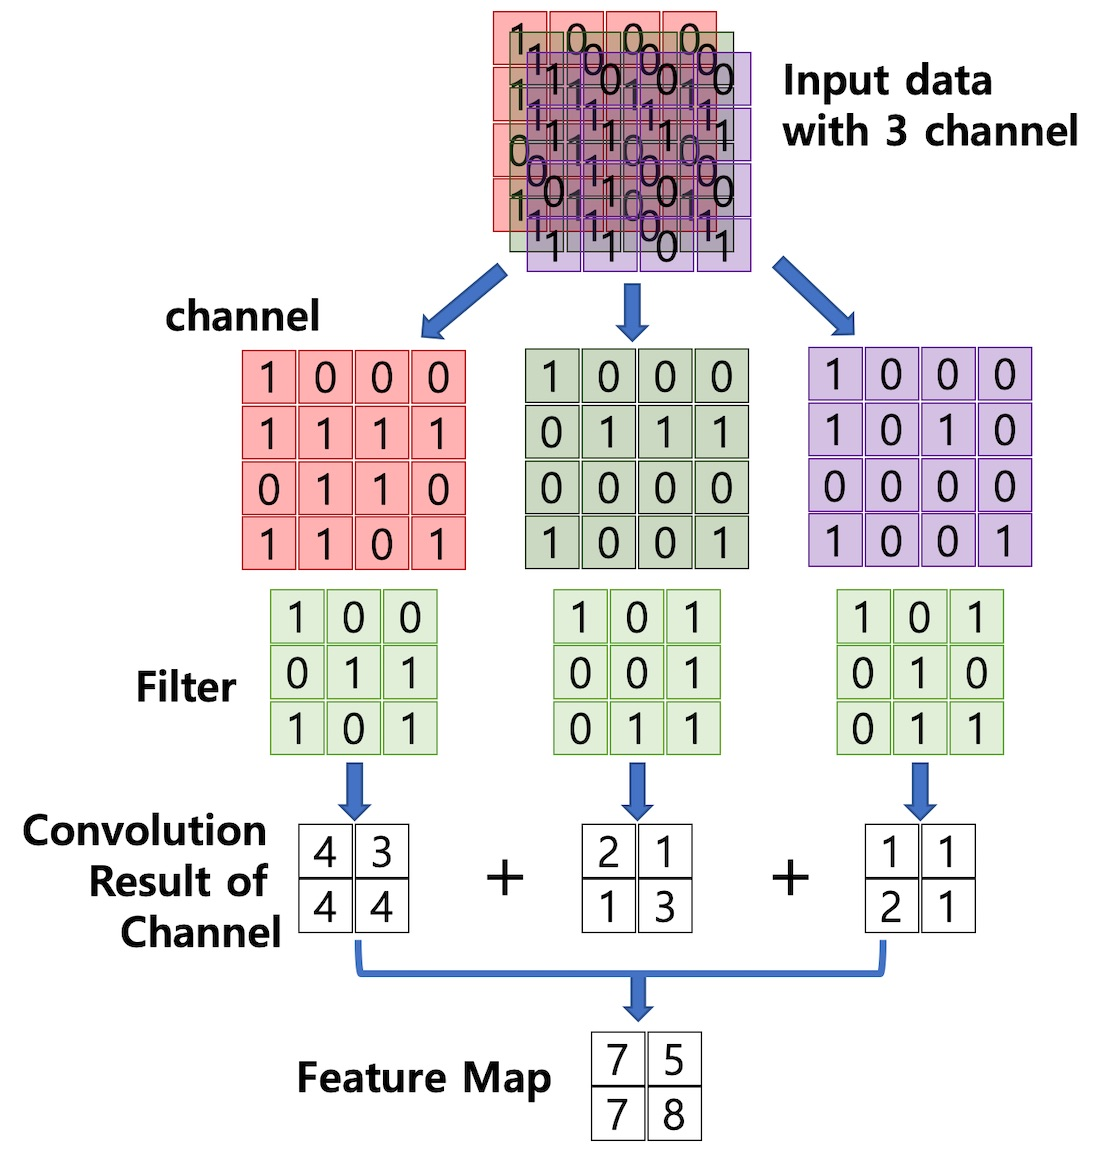

In [12]:
display(Image('image29_conv2.jpg'))

- Feature Map은 합성곱 계산으로 만들어진 행렬이다
- 입력 데이터는 `채널 수와 상관없이` 필터 별로 `1개의 피처 맵`이 만들어진다
### 3) Activation Map
- `하나의 Convolution Layer(합성곱 레이어)`에 크기가 같은 `여러 개의 필터`를 적용할 수 있다. 
    - 이 경우 Feature Map에는 `필터 수 만큼의 채널이 만들어진다`
- `Convolution Layer(합성곱 레이어)`의 입력 데이터를 필터가 순회하며 합성곱을 통해서 만든 `Feature Map`을 `Activation Map`이라고 한다
- Activation Map은 `Feature Map 행렬`에 `활성 함수`를 적용한 `결과`
- 즉, `Convolution Layer(합성곱 레이어)의 최종 결과`가 `Activation Map`
- 즉, `feature map`과 `activation map`은 같은 개념`(=)`이다
## 4. `패딩 (Padding)`
- `Filter와 Stride에 작용`으로 `Feature Map 크기`는 `입력데이터보다 작다` -> `원본보다 출력의 값이 작다 (압축됨)`
- 패딩은 Convolution Layer의 `출력 데이터가 줄어드는 것을 방지하는 방법`이다
- 패딩은 입력 데이터의 `외각`에 `지정된 픽셀 만큼 특정 값(i.e., 0)으로 채워 넣는 것`을 의미
- 보통 패딩 값으로 `0`을 채워 넣는다
### 1) Padding 예시 (2px 추가)
- (32 x 32 x 3) 데이터를 외각에 2 pixel을 추가하여 (36 x 36 x 3) 행렬을 만드는 예제
    - 이미지 상, 하 & 좌, 우에 각 각 2 pixel을 추가하기 때문이다
        - -> (`(2)` + 32 + `(2)`), (`(2)` + 32 + `(2)`), 3)
- Padding을 통해서 Convolution Layer의 출력 데이터의 사이즈를 조절하는 기능이 외에, 외각을 `0`값으로 둘러싸는 특징으로부터 인공신경망이 이미지의 외각을 인식하는 학습 효과도 있다

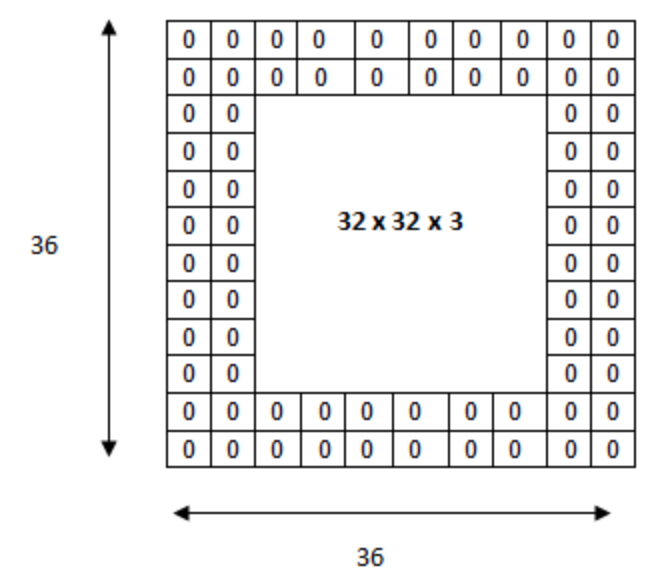

In [13]:
display(Image('image30_padding.png'))

## 5. `Pooling Layer`
- Pooling Layer는 Convolution Layer의 출력 데이터(Feature Map 혹은 Activation Map)의 `크기를 줄이거`나 `특정 데이터를 강조`하는 용도로 사용된다
- Pooling Layer를 처리하는 방법으로는 `Max Pooling`과 `Average Pooling`, `Min Pooling`이 있다
- 정사각 행렬의 특정 영역 안에 값의 `최댓값을 모으거나` 특정 영역의 `평균을 구하는 방식`으로 동작한다

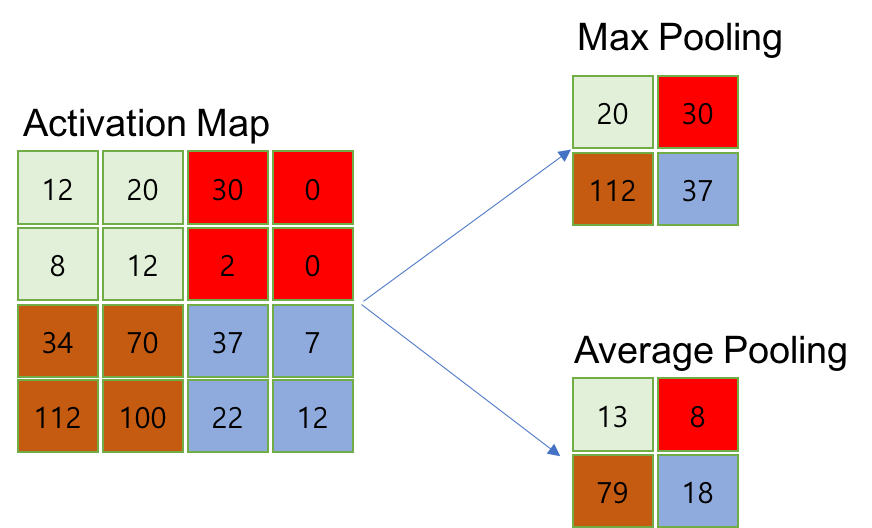

In [14]:
display(Image('image31_maxpulling.png'))

### 1) Max Pooling, Average Pooling
- Max Pooling과 Average Pooling의 동작 방식은 일반적으로 Pooling 크기와 Stride를 같은 크기로 설정하여 모든 원소가 한 번씩 처리 되도록 설정하는 것이다
- CNN에서는 주로 Max Pooling을 사용한다

### 2) Pooling Layer의 특징
    - 학습 대상 파라미터 없음
    - Pooling Layer 통과 시 행렬의 크기 감소
    - Pooling Layer 통과 시 채널 수 변경 없음
